In [163]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [164]:
dataset = pd.read_csv(r"C:\Users\My\Downloads\Real estate-1.csv")
dataset.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [165]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


In [229]:
# int64 to float64
dataset['X4 number of convenience stores'] = dataset['X4 number of convenience stores'].astype('float64')

In [167]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    float64
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(7)
memory usage: 22.8 KB


In [168]:
dataset.isnull().sum()

X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

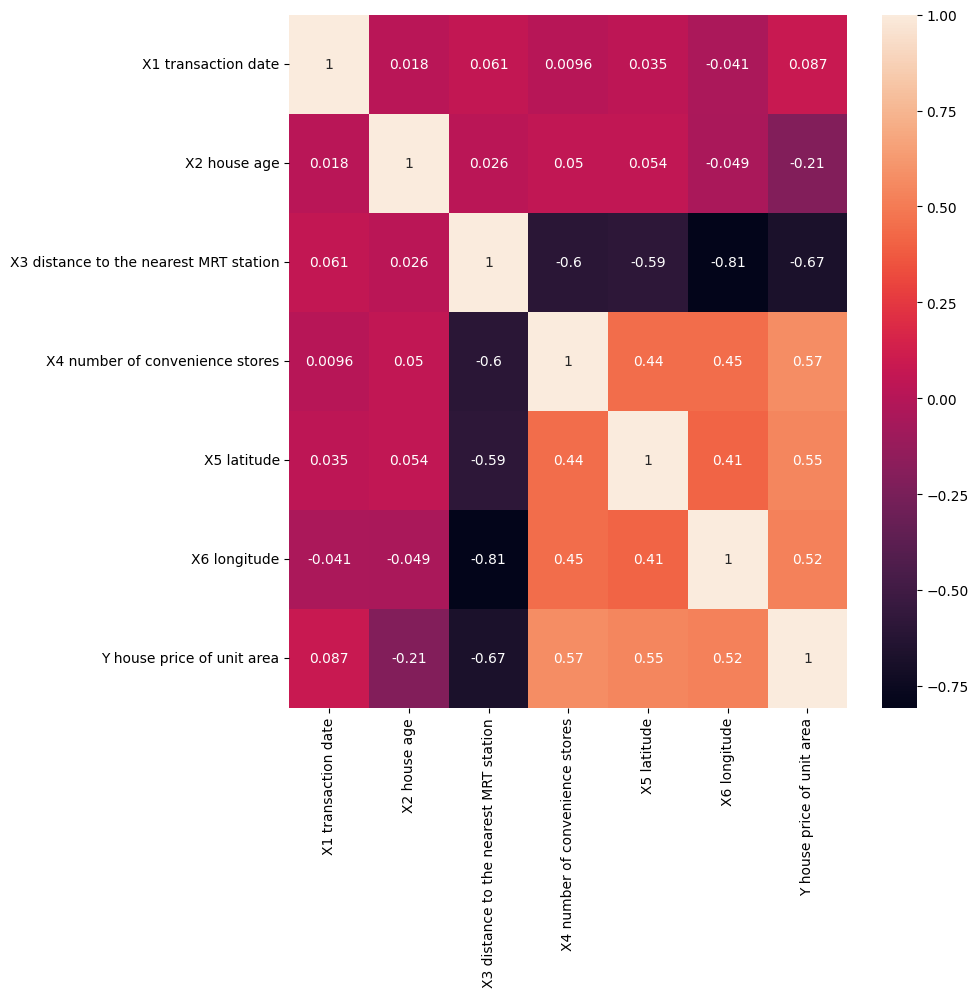

In [169]:
plt.figure(figsize=(9,9))
sns.heatmap(data=dataset.corr(),annot=True)
plt.show()

In [170]:
x = dataset.iloc[:,:-1]
y = dataset["Y house price of unit area"]

In [171]:
sc = StandardScaler()
sc.fit(x)
x = pd.DataFrame(sc.transform(x),columns=x.columns)

In [172]:
# Make Train_Test Model
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [216]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [217]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
import numpy as np

# Linear Regrassion Model

In [174]:
# Linear Regrassion Model
lr = LinearRegression()
lr.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [175]:
# Accurecy test
lr.score(x_test,y_test)*100

68.10580555095946

In [190]:
# Linear Regrassion (m) Value
lr.coef_

array([ 1.53225706, -3.08125978, -5.99866592,  3.21097555,  2.83903432,
       -0.45208121])

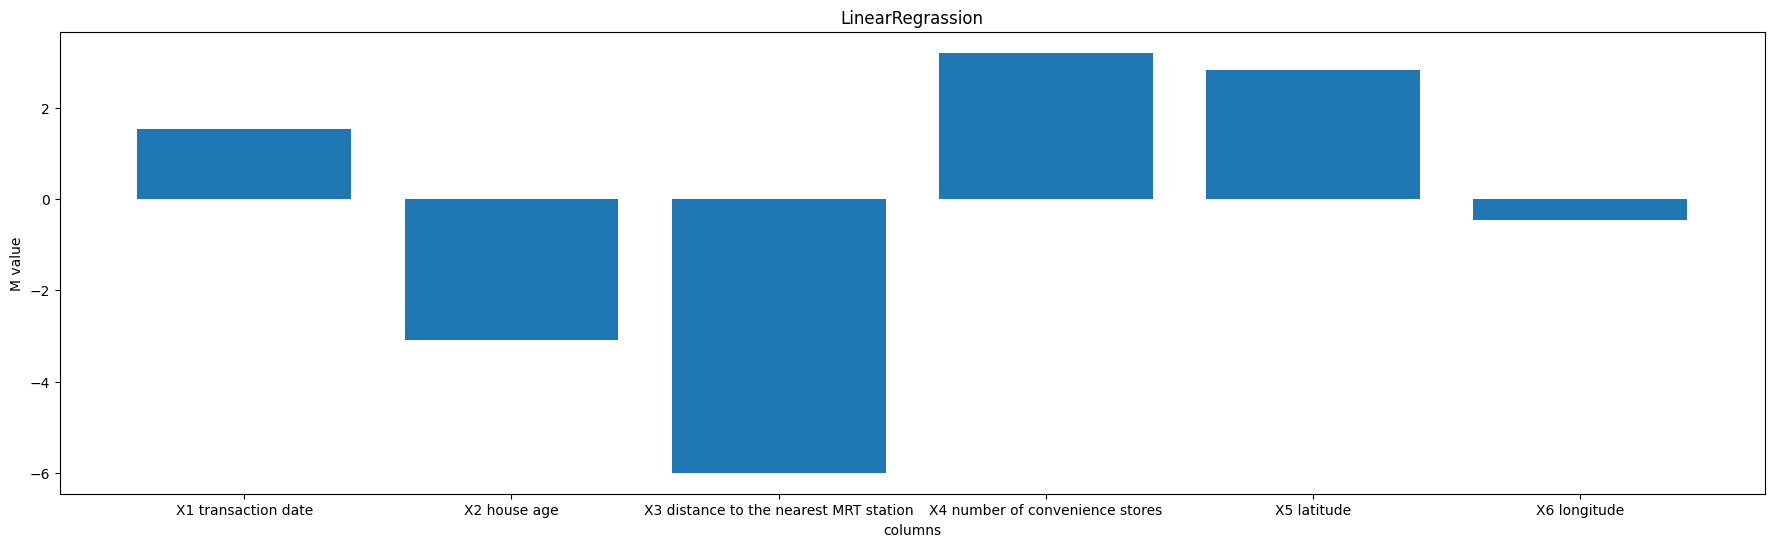

In [191]:
# Linear Regrassion (m) value graph
plt.figure(figsize=(22,6))
plt.bar(x.columns, lr.coef_)
plt.title("LinearRegrassion")
plt.xlabel("columns")
plt.ylabel("M value")
plt.show() 

In [224]:
# mean_squared_error
print(mean_squared_error(y_test,lr.predict(x_test)))

# mean_absolute_error
print(mean_absolute_error(y_test,lr.predict(x_test)))

# root_mean_squared_error
print(np.sqrt(mean_squared_error(y_test,lr.predict(x_test))))

53.505619124502054
5.305355690074042
7.31475352452166


# Lasso Model

In [208]:
# Lasso Model
# it do Feature selection
la = Lasso(alpha=0.1)
la.fit(x_train,y_train)

,alpha,0.1
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [209]:
la.score(x_test,y_test)*100

68.37869900267756

In [210]:
la.coef_

array([ 1.41780167, -2.96365958, -5.55740703,  3.17681117,  2.81986539,
       -0.        ])

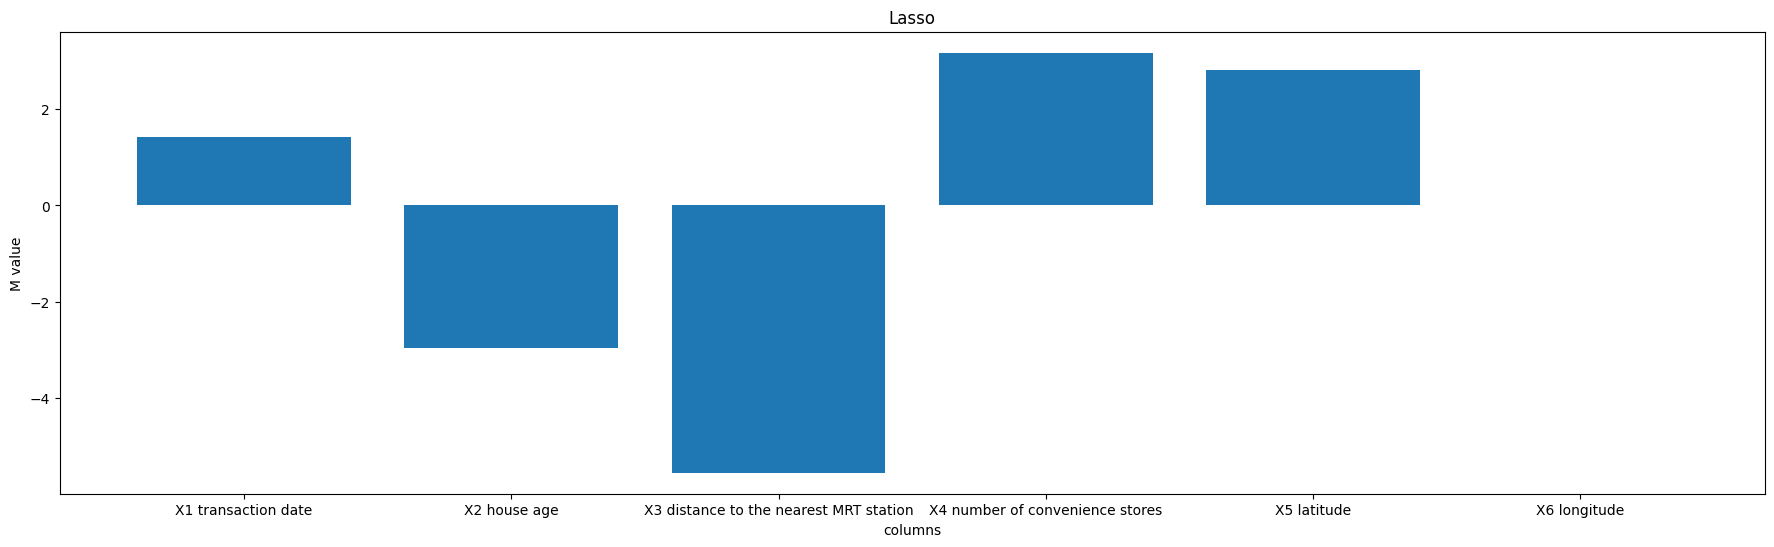

In [211]:
# Lasso (m) value graph
plt.figure(figsize=(22,6))
plt.bar(x.columns, la.coef_)
plt.title("Lasso")
plt.xlabel("columns")
plt.ylabel("M value")
plt.show() 

In [225]:
# mean_squared_error
print(mean_squared_error(y_test,la.predict(x_test)))

# mean_absolute_error
print(mean_absolute_error(y_test,la.predict(x_test)))

# root_mean_squared_error
print(np.sqrt(mean_squared_error(y_test,la.predict(x_test))))

53.04781376708727
5.304485626701941
7.283393011988799


# Ridge Model

In [212]:
# Ridge Model
ri = Lasso(alpha=0.1)
ri.fit(x_train,y_train)

,alpha,0.1
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [213]:
ri.score(x_test,y_test)*100

68.37869900267756

In [214]:
ri.coef_

array([ 1.41780167, -2.96365958, -5.55740703,  3.17681117,  2.81986539,
       -0.        ])

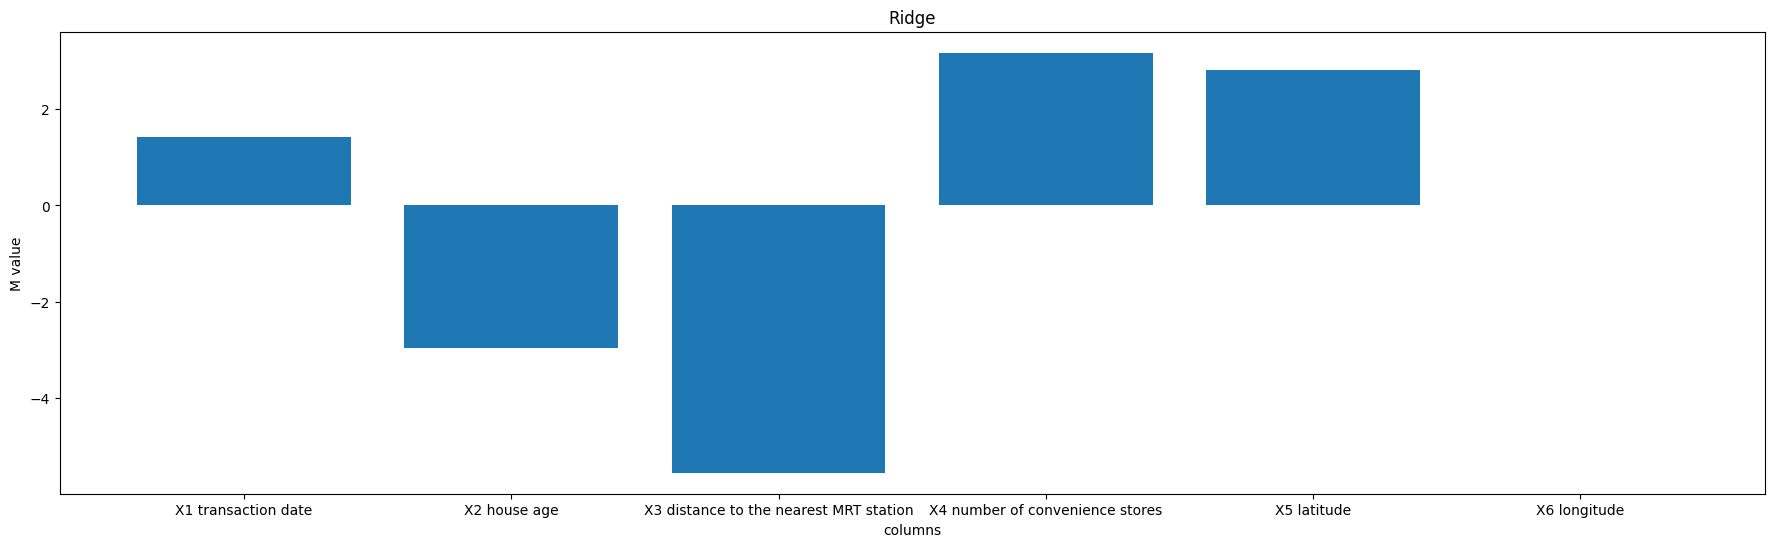

In [215]:
# Ridge (m) value graph
plt.figure(figsize=(22,6))
plt.bar(x.columns, ri.coef_)
plt.title("Ridge")
plt.xlabel("columns")
plt.ylabel("M value")
plt.show() 

In [226]:
# mean_squared_error
print(mean_squared_error(y_test,ri.predict(x_test)))

# mean_absolute_error
print(mean_absolute_error(y_test,ri.predict(x_test)))

# root_mean_squared_error
print(np.sqrt(mean_squared_error(y_test,ri.predict(x_test))))

53.04781376708727
5.304485626701941
7.283393011988799


# Final (m) value

In [228]:
df = pd.DataFrame({"column_name":x.columns,"LinearRegression":lr.coef_,"Lasso":la.coef_,"Ridge":ri.coef_})
df

,column_name,LinearRegression,Lasso,Ridge
0,X1 transaction date,1.532257,1.417802,1.417802
1,X2 house age,-3.081260,-2.963660,-2.963660
2,X3 distance to the nearest MRT station,-5.998666,-5.557407,-5.557407
3,X4 number of convenience stores,3.210976,3.176811,3.176811
4,X5 latitude,2.839034,2.819865,2.819865
5,X6 longitude,-0.452081,-0.000000,-0.000000
